In [1]:
import mne
#%gui qt
#import matplotlib

#%matplotlib qt
import numpy as np
from matplotlib import pyplot as plt
from stormdb.access import Query
from pickle import load
from scipy import stats
from mne.datasets import sample
from mne.stats import spatio_temporal_cluster_1samp_test
import os
import pickle
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# os.environ['ETS_TOOLKIT'] = 'qt4'
# os.environ['QT_API'] = 'pyqt5'
# %gui qt
#mne.viz.set_3d_backend("notebook")

In [2]:
proj_name = 'MINDLAB2020_MEG-AuditoryPatternRecognition'
wdir = '/projects/' + proj_name + '/scratch/working_memory/'
data_dir = wdir + 'averages/data/'

In [3]:
# Read stats\
qy = Query(proj_name)
subjects = qy.get_subjects()
scode = 63
sub = subjects[scode-1]
fname = '{}{}_evoked.p'.format(data_dir,sub)
cfile = open(fname,'rb')
evokeds = pickle.load(cfile)
cfile.close()


############### mag ################

############# encoding ################

main


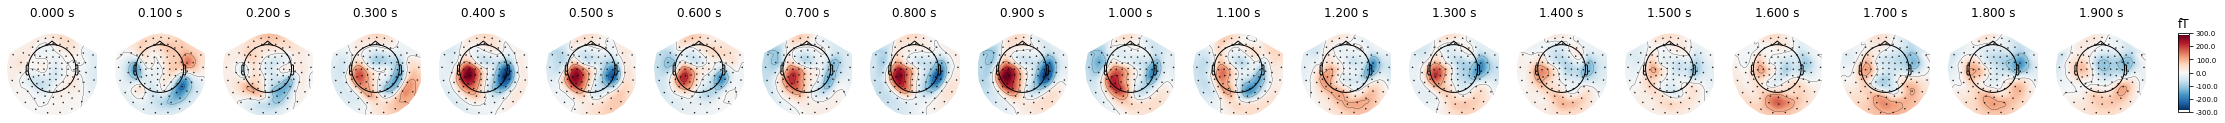

inv


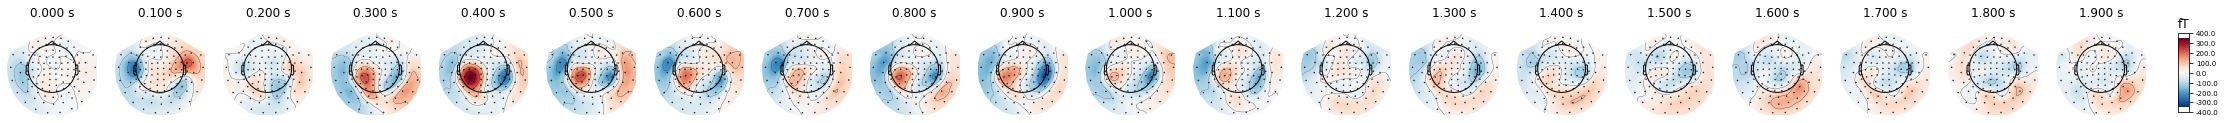

difference


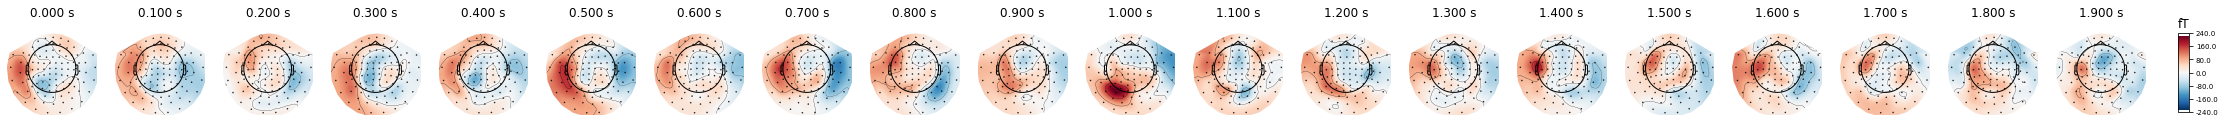

############# delay ################

main


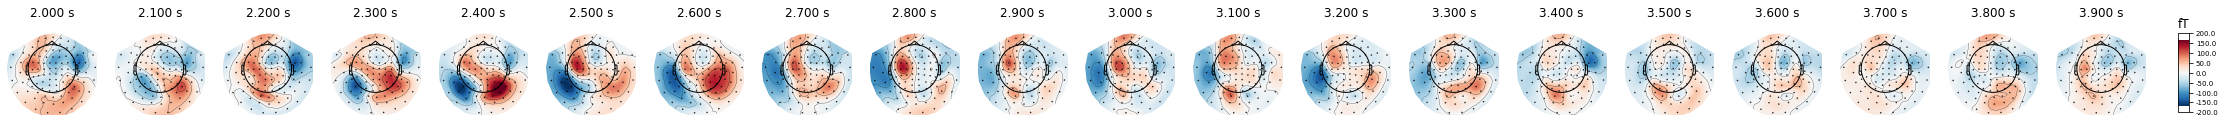

inv


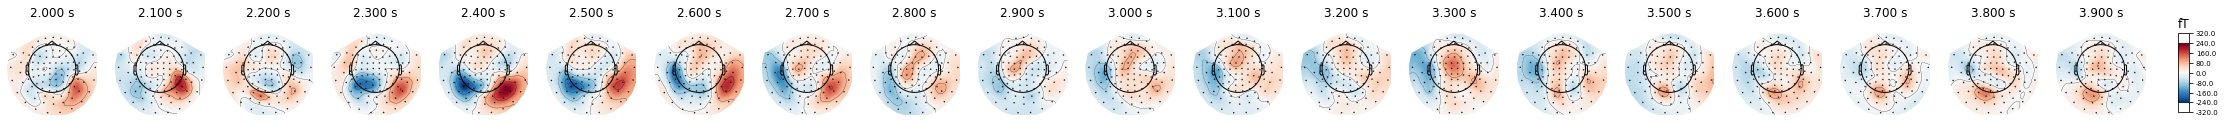

difference


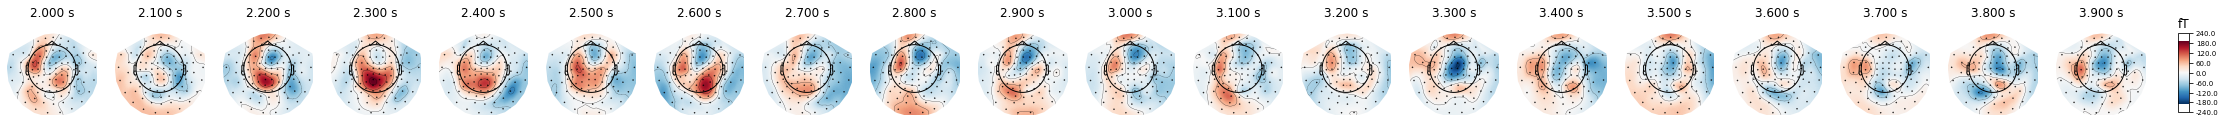

############# retrieval ################

main


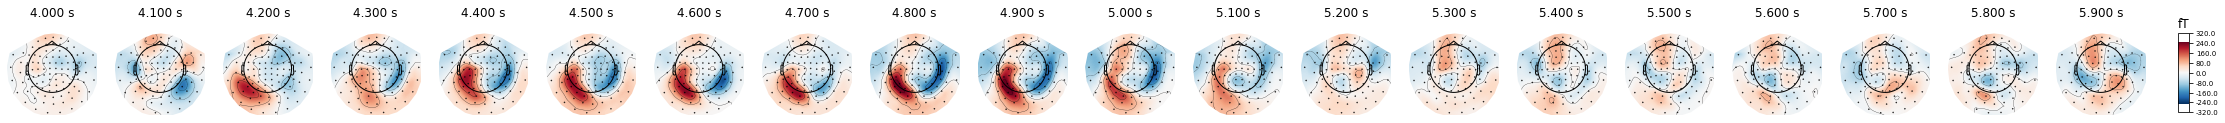

inv


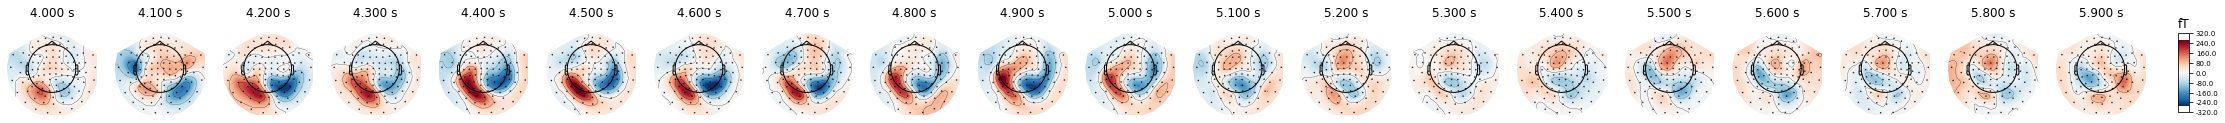

difference


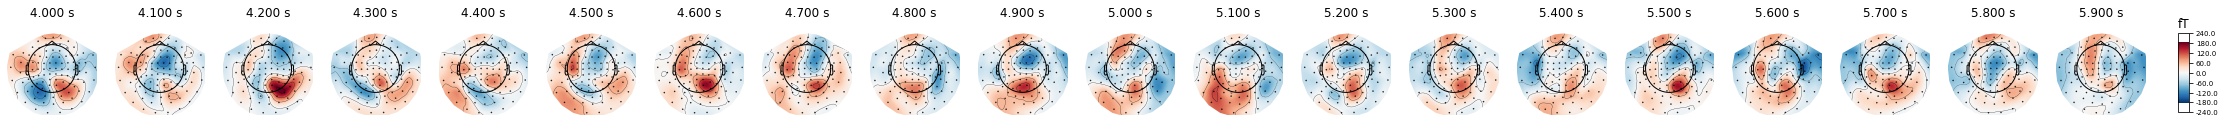


############### grad ################

############# encoding ################

main


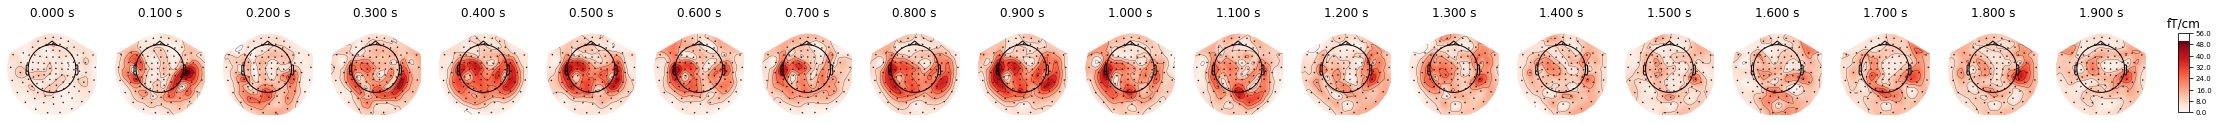

inv


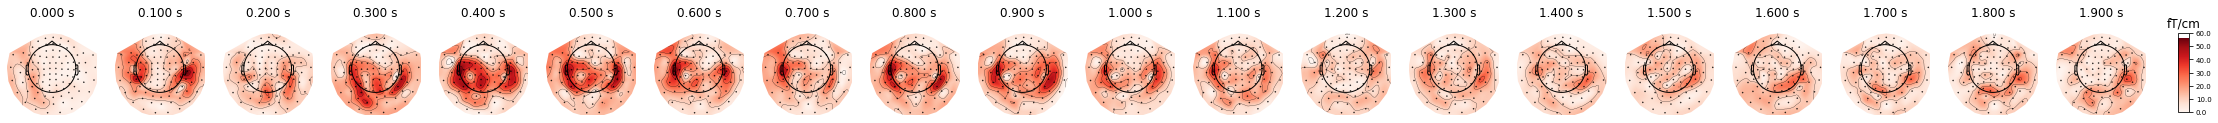

difference


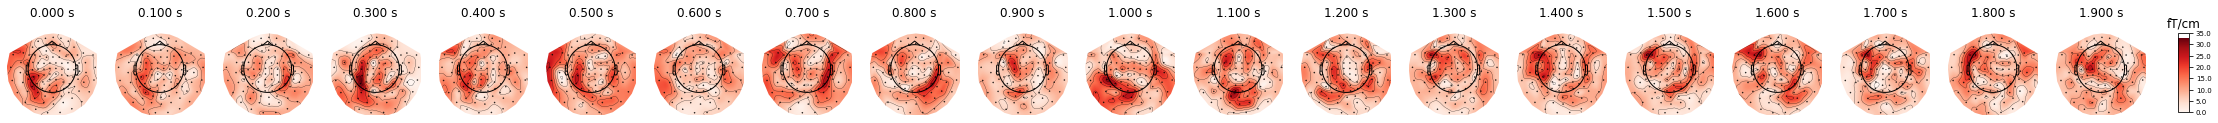

############# delay ################

main


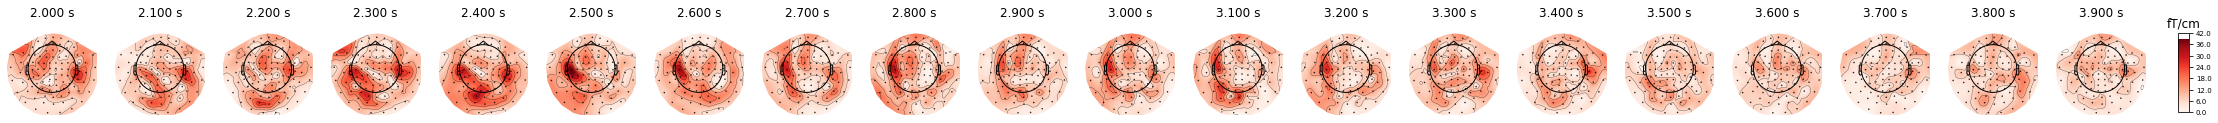

inv


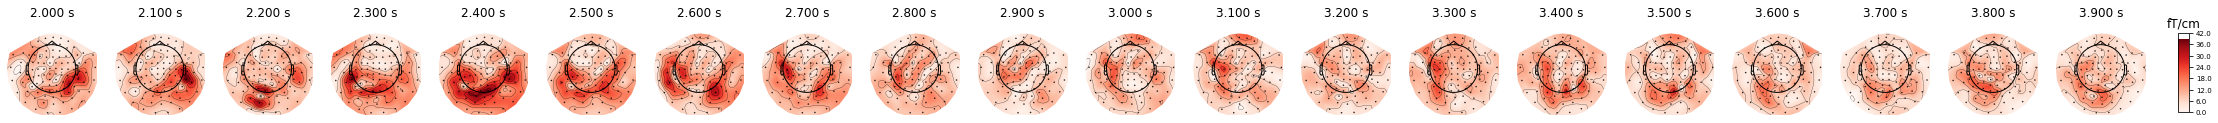

difference


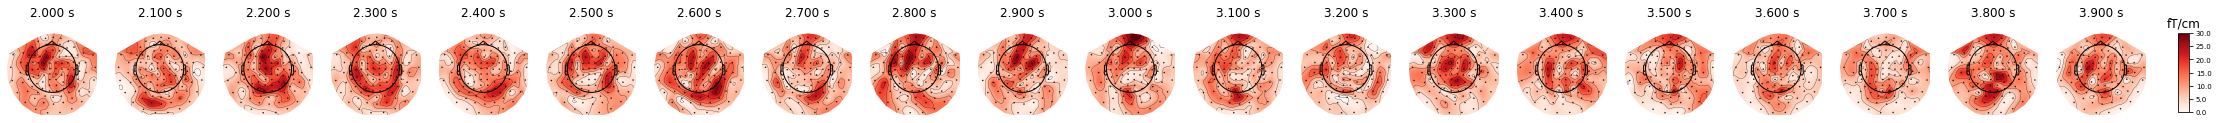

############# retrieval ################

main


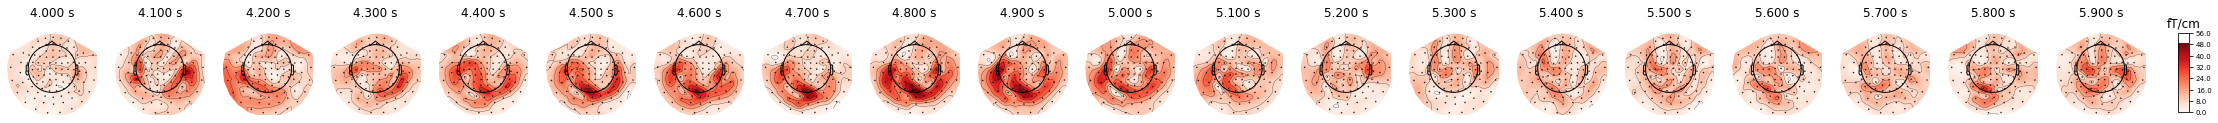

inv


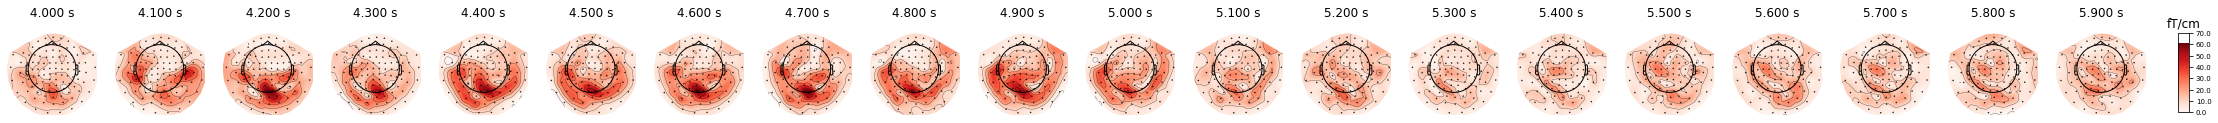

difference


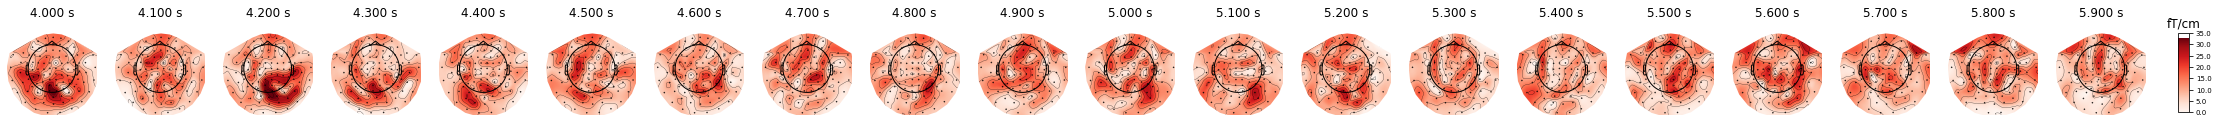

In [4]:
# Plot all topomaps
periods = {'encoding': [0,2], 'delay': [2,4], 'retrieval': [4,6]}
ch_type = ['mag','grad']
for cht in ch_type:
    print('\n############### {} ################\n'.format(cht))
    for p in periods:
        print('############# {} ################\n'.format(p))
        for c in evokeds:
            tmin = periods[p][0]
            tmax = periods[p][1]
            cERF = evokeds[c]['all'].copy()
            #tidx = np.where([x and y for x,y in zip(ERF.times >= tmin, ERF.times <= tmax)])[0]
            cERF = cERF.pick_types(meg=cht).crop(tmin=tmin, tmax=tmax)
            plot_times = np.arange(0,2,0.1) + tmin
            
            print(c)
            cERF.plot_topomap(times=plot_times)

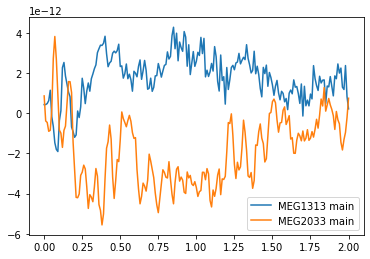

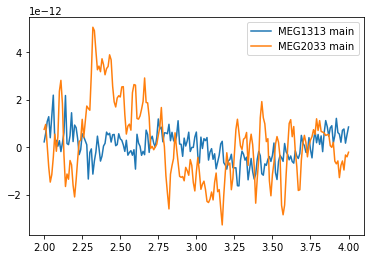

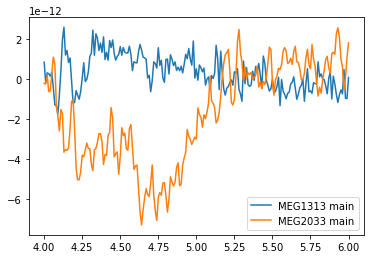

In [5]:
# Plot channel pairs
periods = {'encoding': [0,2], 'delay': [2,4], 'retrieval': [4,6]}
channels = ['MEG1313','MEG2033']
lgd_labs = []
for p in periods:
    fig = plt.figure()
    for cht in channels:
        for c in evokeds:
            if (c != 'difference') and (c != 'inv'):
                lgd_labs.append(cht + ' ' + c)
                tmin = periods[p][0]
                tmax = periods[p][1]
                cERF = evokeds[c]['all'].copy().pick_channels([cht]).crop(tmin=tmin, tmax=tmax)
                plt.plot(cERF.times,np.squeeze(cERF.data))
    plt.legend(lgd_labs)